In [1]:
#import libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [3]:
#Reading the raw data in the CSV file into a dataframe, df

df = pd.read_csv("Expanded_data_with_more_features.csv")

#Show the first five rows
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
# Check for missing values in the dataset
print(df.isnull().sum())

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [5]:
# Rename columns
df.rename(columns={'Unnamed:0':'ID_Number'},inplace=True)


In [6]:
# show all the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [20]:
# Dealing with missing values
# Fill missing values in numeric columns with the mean
#df.fillna(df.mean(), inplace=True)
# Interpolate missing values
numeric_columns = ['MathScore', 'ReadingScore', 'WritingScore']
for column in numeric_columns:
        df[column].interpolate(method='linear', inplace=True)
        
# Forward fill missing values in 'NrSiblings' column
df['NrSiblings'].fillna(method='ffill', inplace=True)

# Forward-fill missing values in categorical columns
df.fillna(method='ffill', inplace=True)

In [8]:
# Check for missing values AGAIN
print(df.isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            1
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


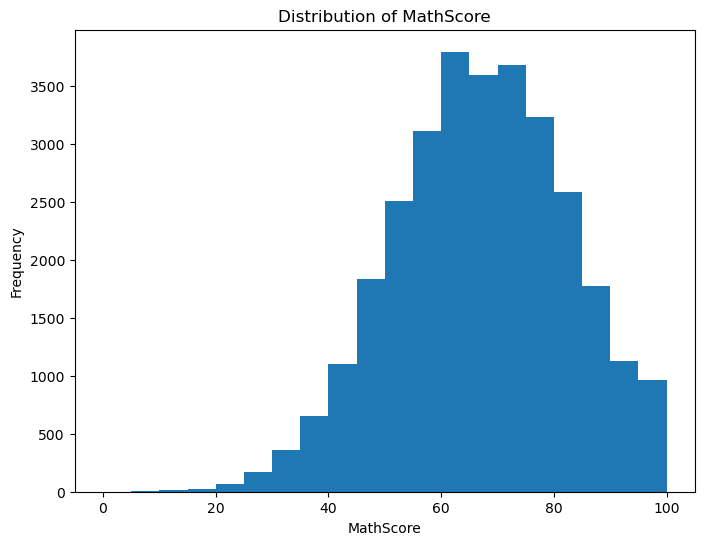

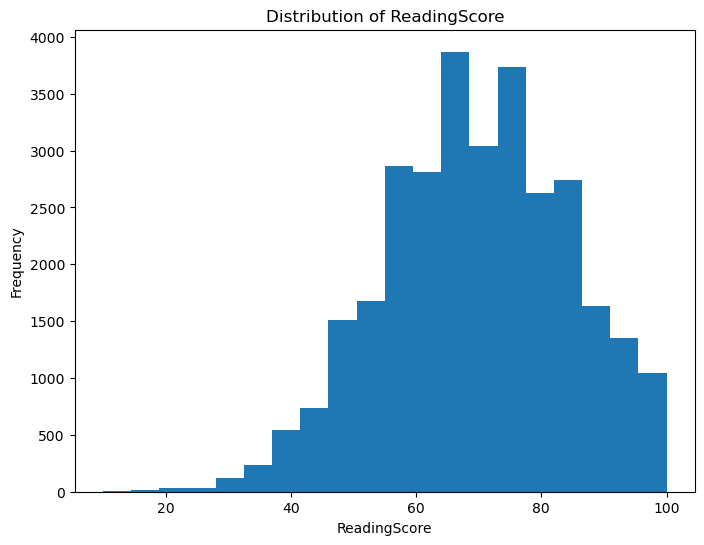

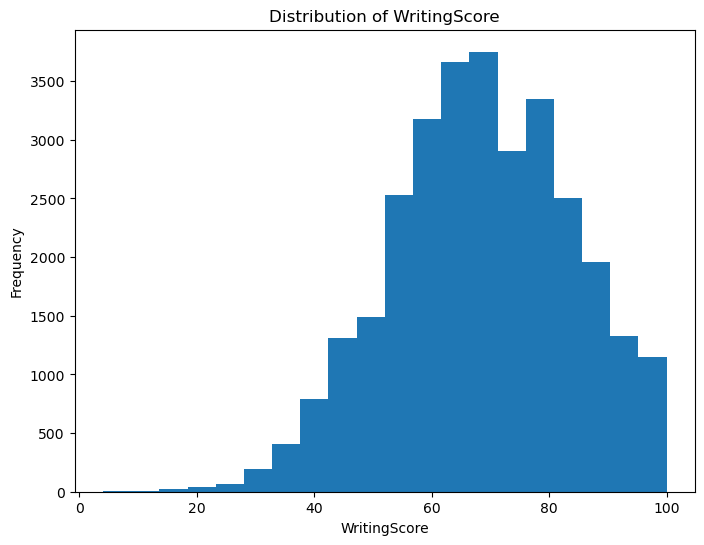

In [9]:
# Explore the distribution of each feature using histograms
numeric_columns = ['MathScore', 'ReadingScore', 'WritingScore']


# Plot histograms for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()



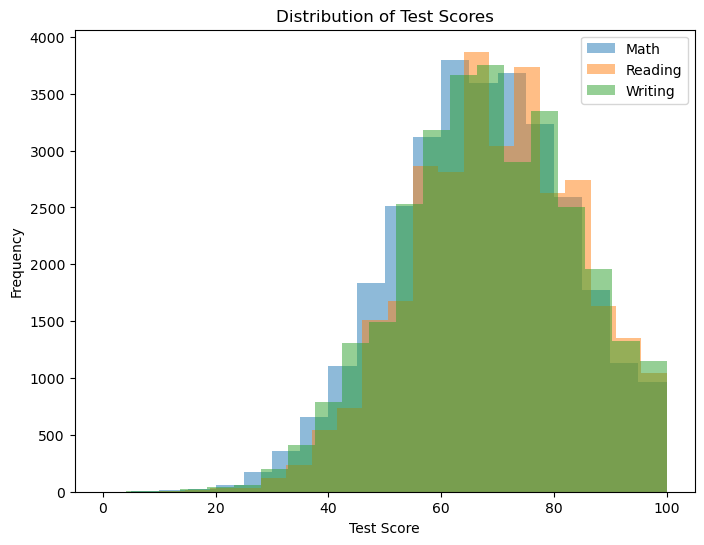

In [31]:
# Plot histograms for test scores (combined)
plt.figure(figsize=(8, 6))
plt.hist(df['MathScore'], bins=20, alpha=0.5, label='Math')
plt.hist(df['ReadingScore'], bins=20, alpha=0.5, label='Reading')
plt.hist(df['WritingScore'], bins=20, alpha=0.5, label='Writing')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of Test Scores')
plt.legend()
plt.show()

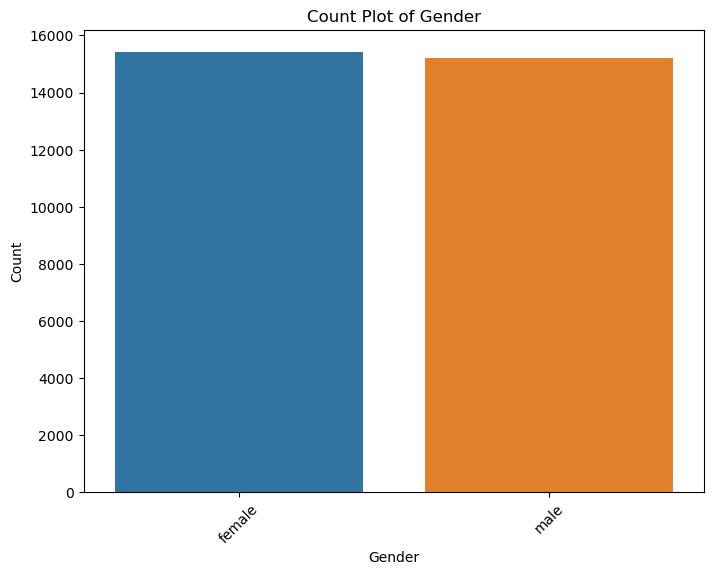

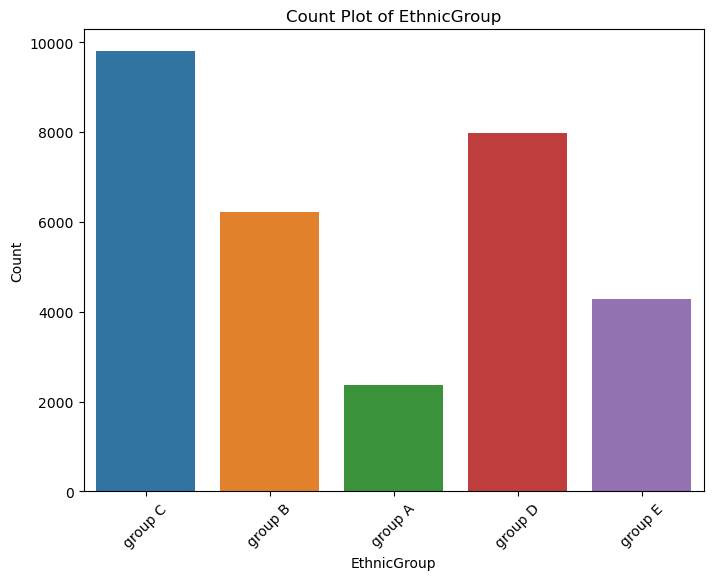

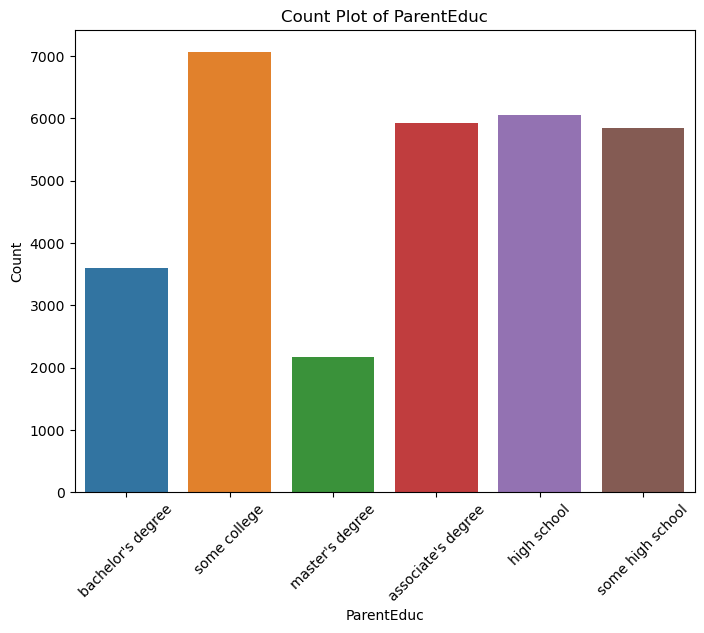

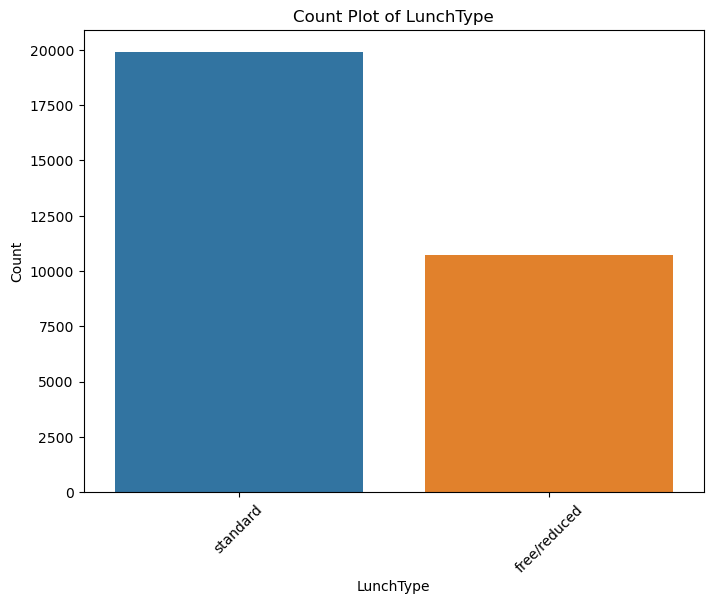

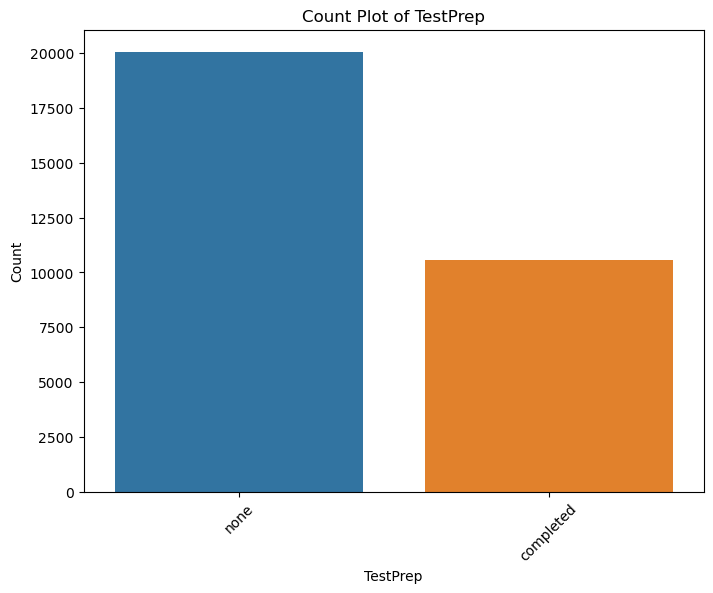

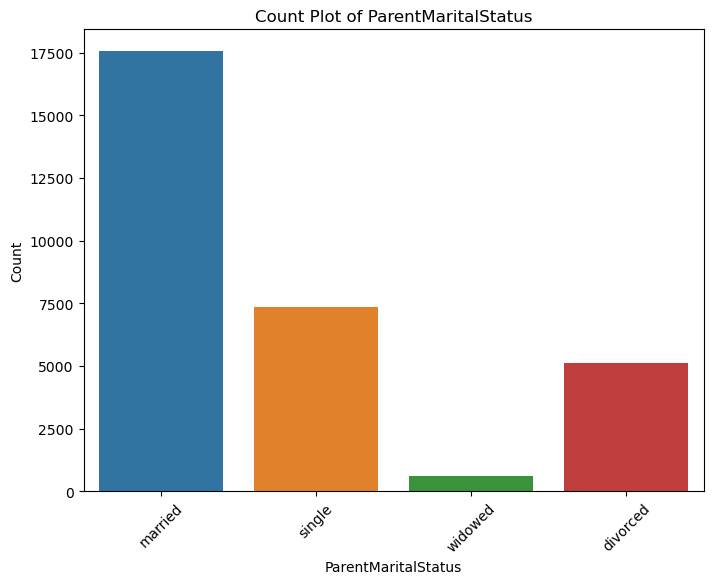

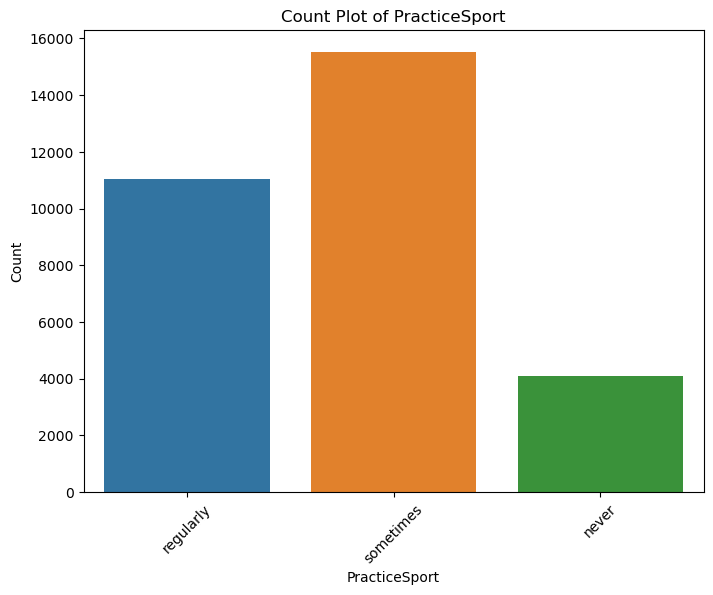

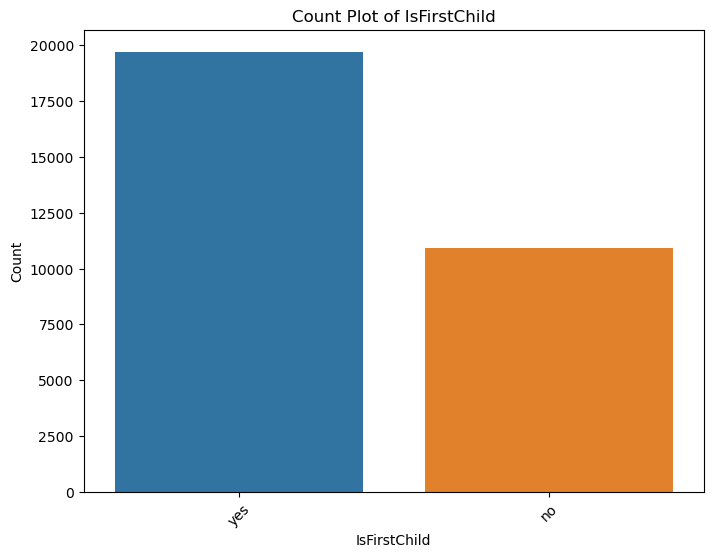

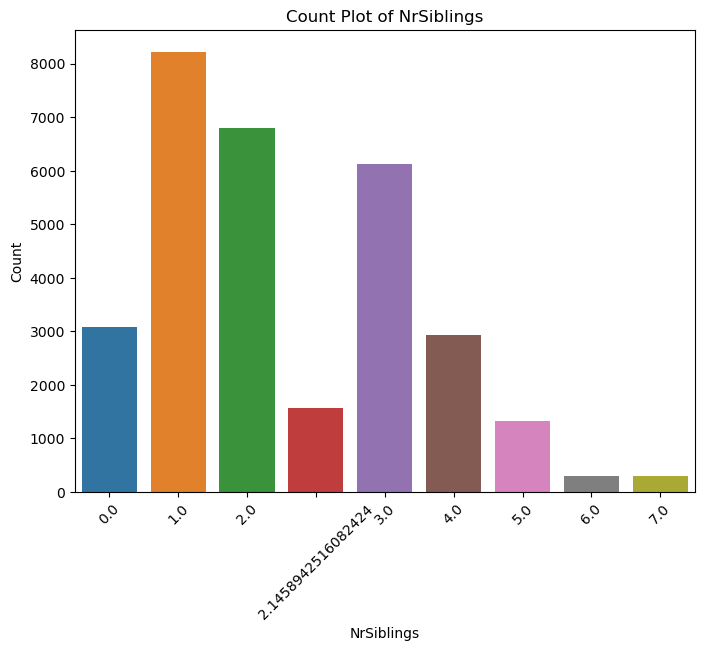

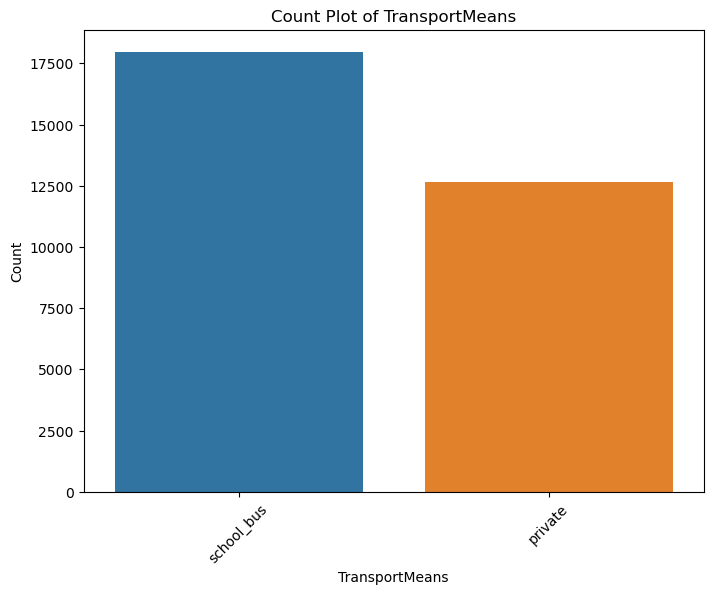

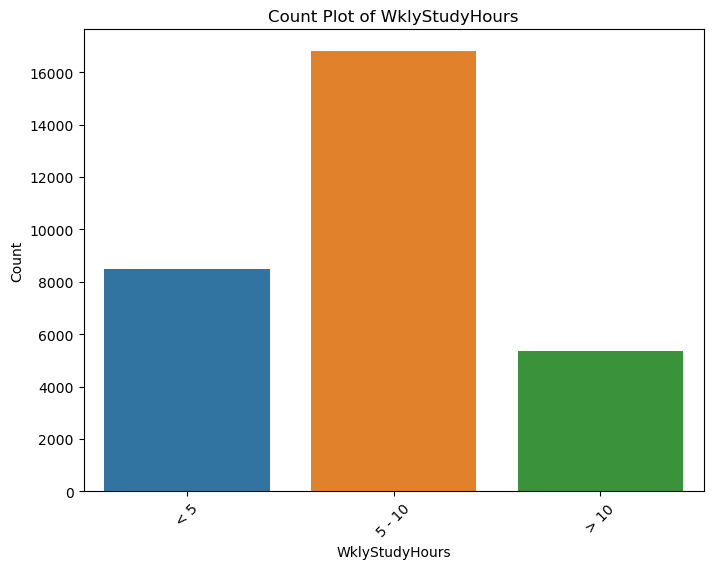

In [21]:
# Explore the distribution of each feature using histograms (loops)

categorical_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus',
                       'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours']

# Plot count plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

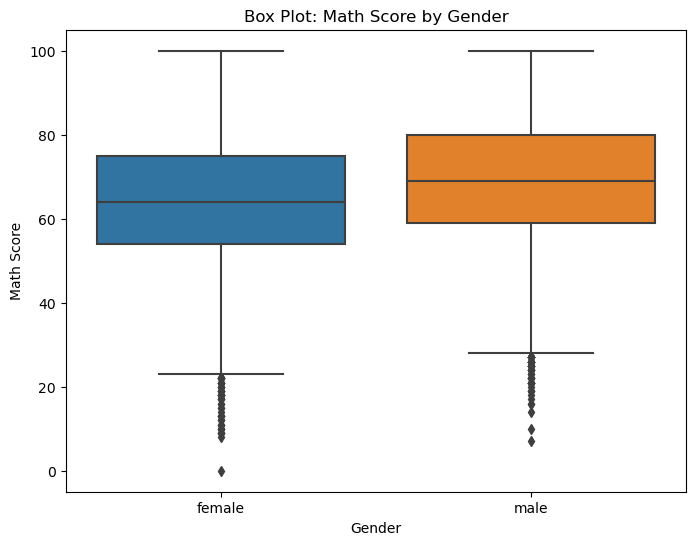

In [32]:
# Plot box plots for test scores by a categorical variable (Independent plots)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='MathScore')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Box Plot: Math Score by Gender')
plt.show()

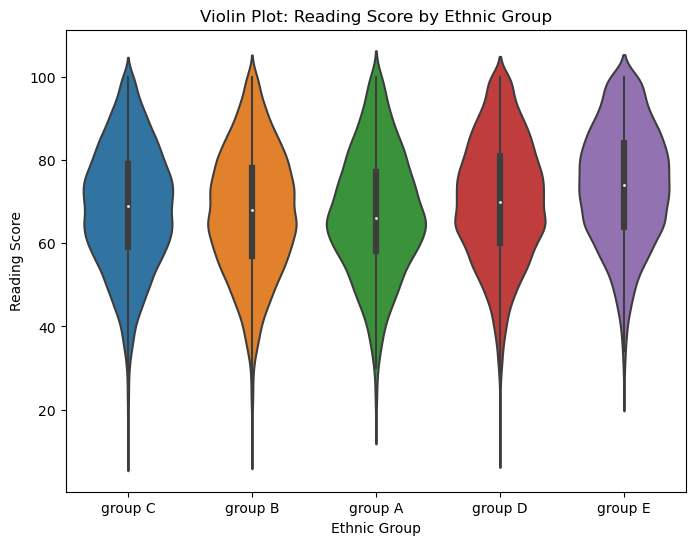

In [33]:
# Plot violin plots for test scores by a categorical variable (repeated on singularity)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='EthnicGroup', y='ReadingScore')
plt.xlabel('Ethnic Group')
plt.ylabel('Reading Score')
plt.title('Violin Plot: Reading Score by Ethnic Group')
plt.show()

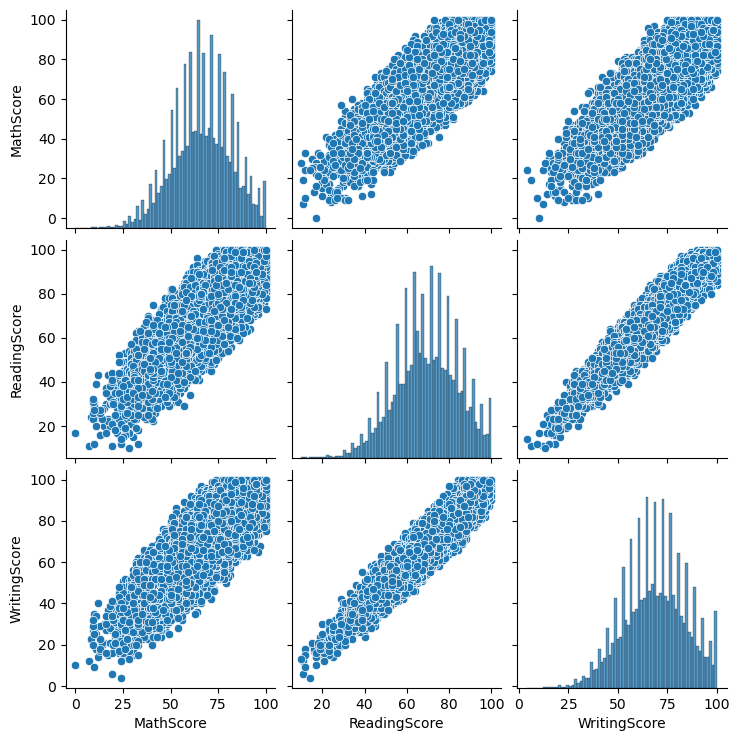

In [22]:
# Identify patterns or anomalies
# Explore relationships between numeric variables using scatter plots
sns.pairplot(data=df[numeric_columns])
plt.show()

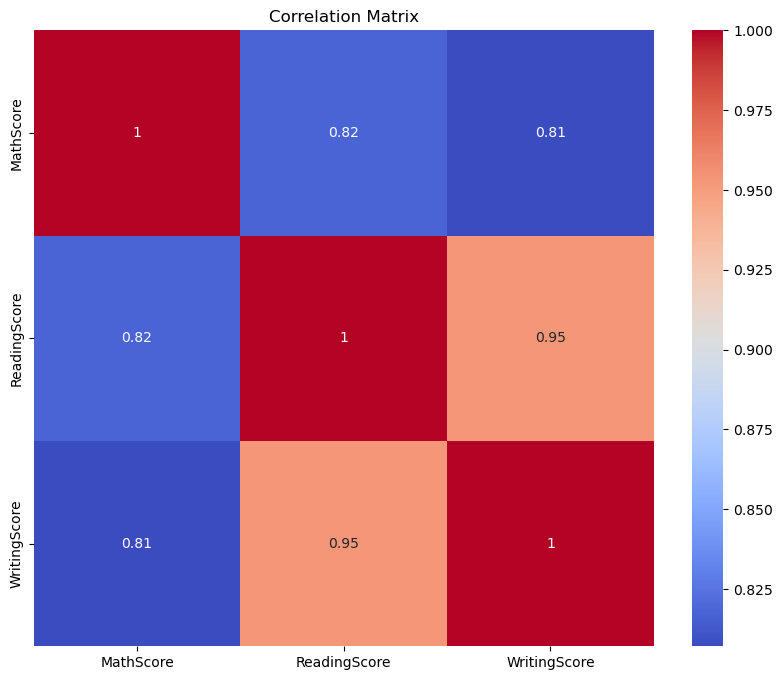

In [23]:
# Analyze correlations between numeric variables using a heatmap
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

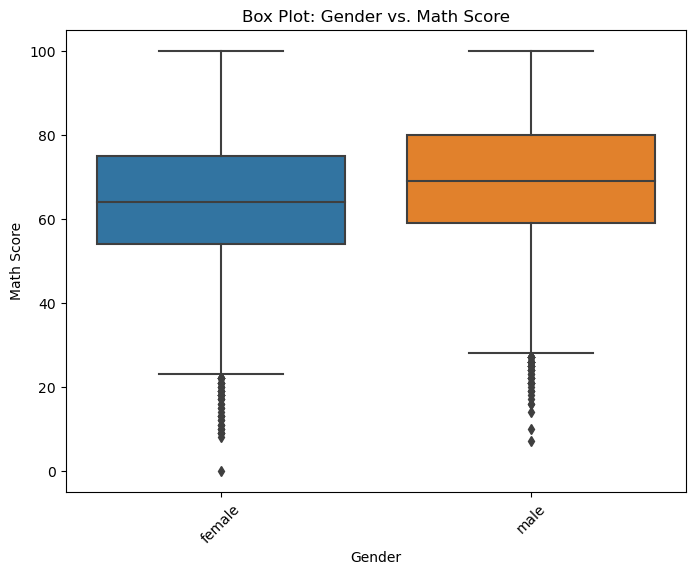

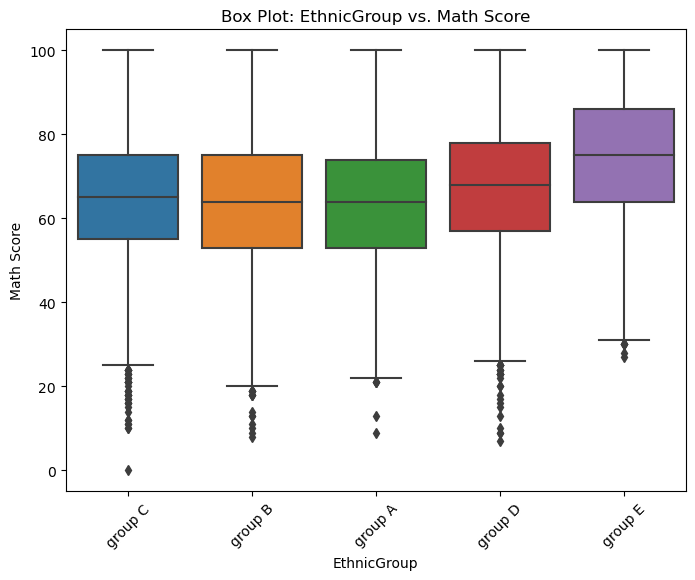

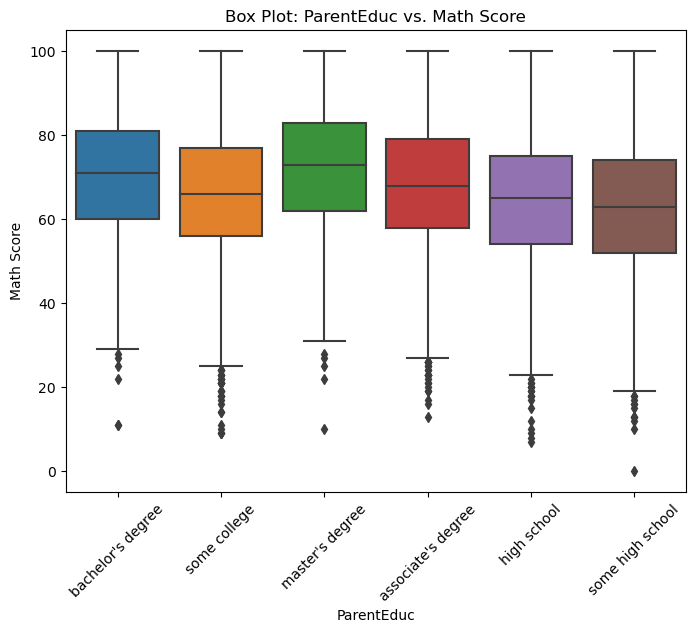

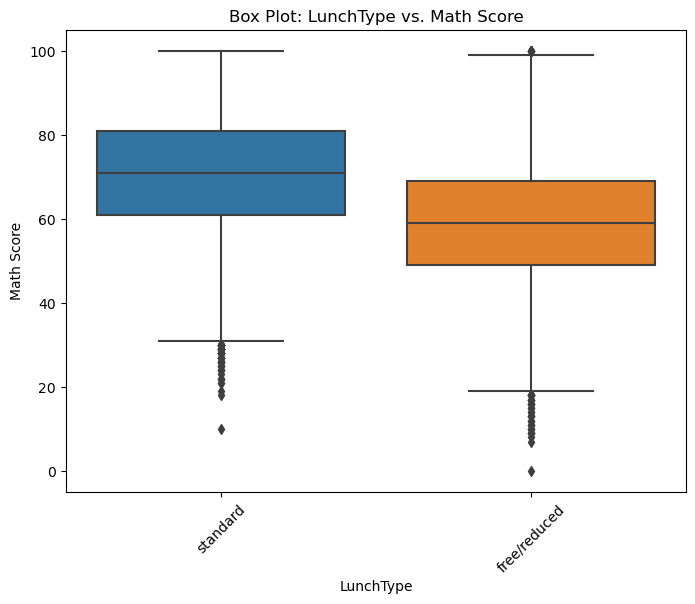

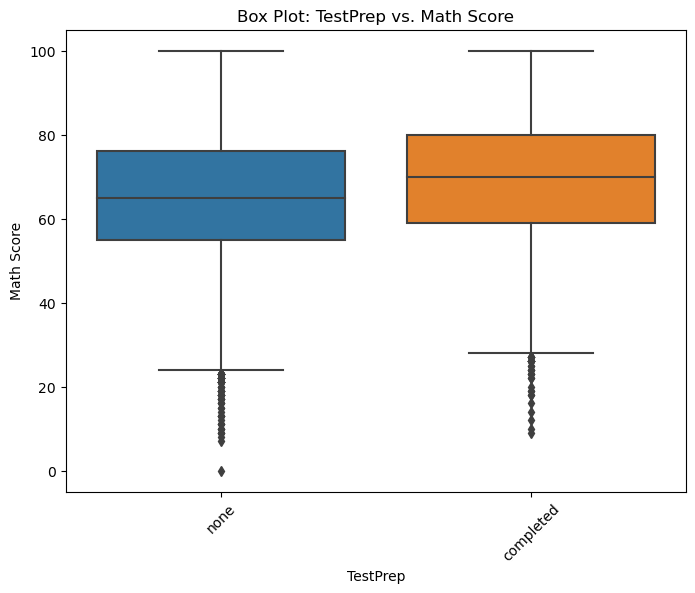

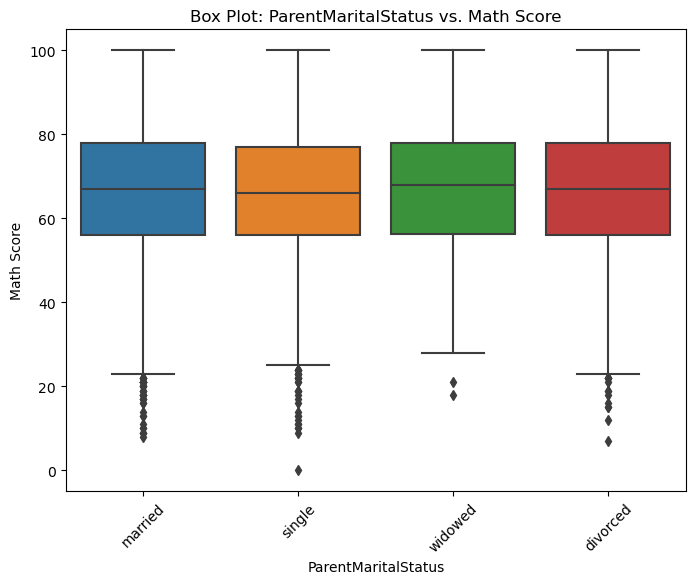

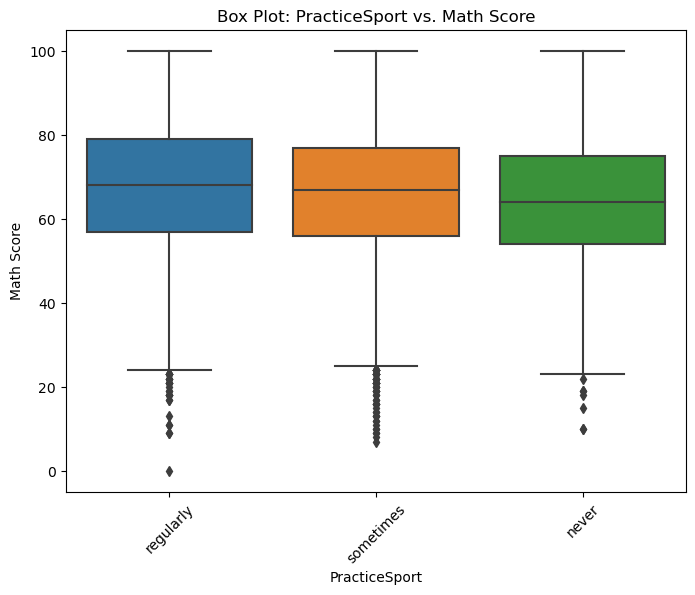

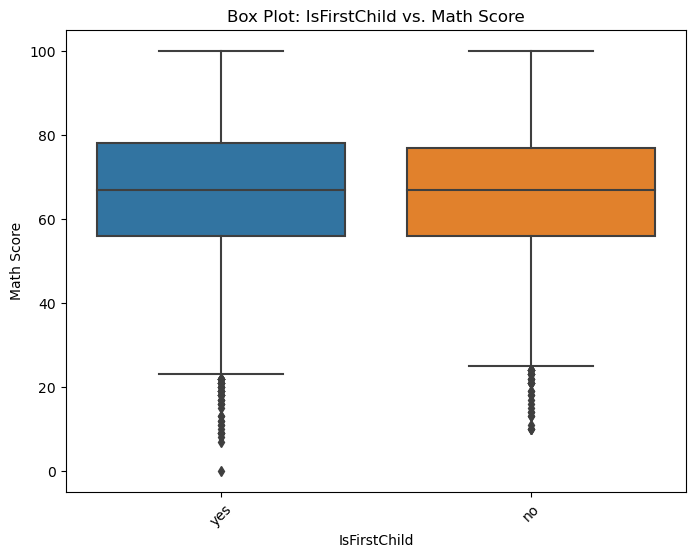

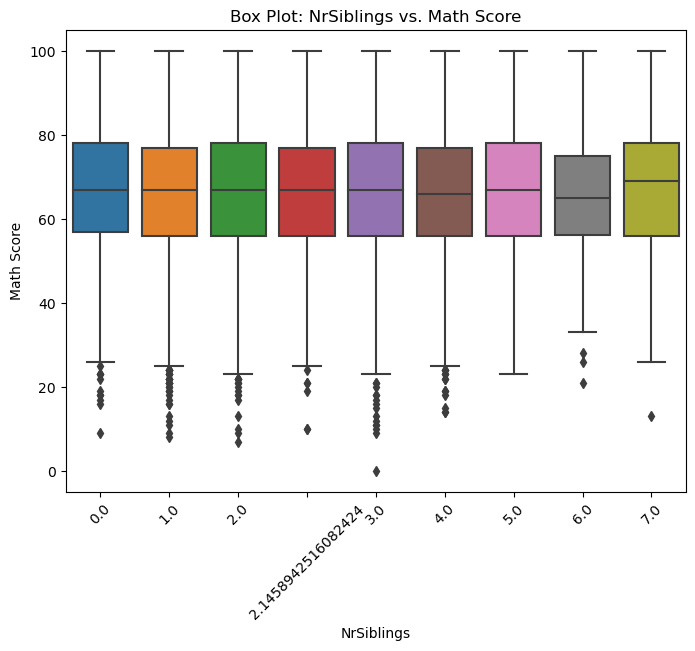

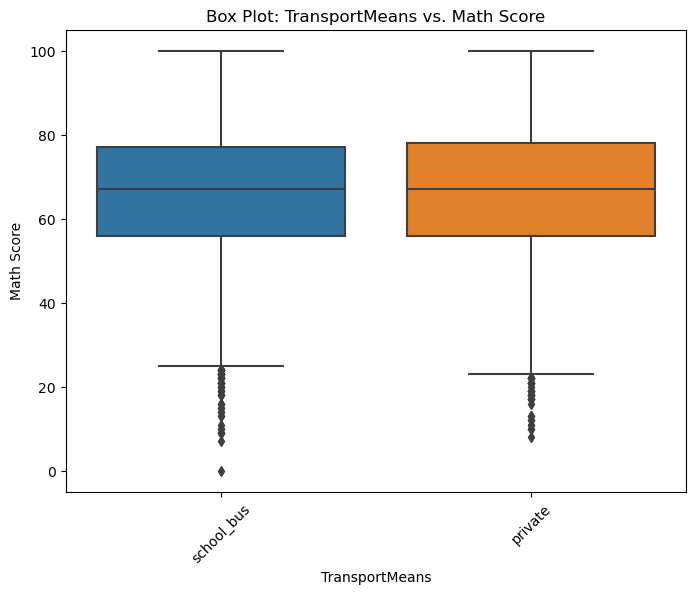

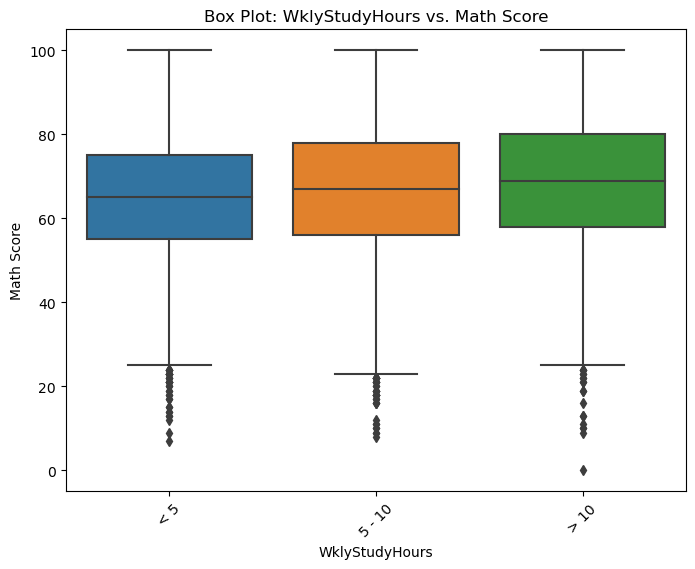

In [24]:
# Explore relationships between numeric and categorical variables using box plots or violin plots
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column, y='MathScore')
    plt.xlabel(column)
    plt.ylabel('Math Score')
    plt.title(f'Box Plot: {column} vs. Math Score')
    plt.xticks(rotation=45)
    plt.show()

In [25]:
# Calculate descriptive statistics for numeric columns
# We already defined numeric_columns = ['MathScore', 'ReadingScore', 'WritingScore']

statistics = df[numeric_columns].describe()

#descriptive_stats = df[['MathScore', 'ReadingScore', 'WritingScore']].describe()

# Print the descriptive statistics
print(statistics)

          MathScore  ReadingScore  WritingScore
count  30641.000000  30641.000000  30641.000000
mean      66.558402     69.377533     68.418622
std       15.361616     14.758952     15.443525
min        0.000000     10.000000      4.000000
25%       56.000000     59.000000     58.000000
50%       67.000000     70.000000     69.000000
75%       78.000000     80.000000     79.000000
max      100.000000    100.000000    100.000000


In [50]:
# Drop the "Unnamed: 0" and "NrSiblings" columns
df_dropped = df.drop(["Unnamed: 0", "NrSiblings"], axis=1)


# Compute Pearson correlation coefficient
pearson_corr = df_dropped.corr(method='pearson')

# Compute Spearman's rank correlation coefficient
spearman_corr = df_dropped.corr(method='spearman')

# Display the correlation matrices
print("Pearson Correlation Coefficient:")
print(pearson_corr)
print("\nSpearman's Rank Correlation Coefficient:")
print(spearman_corr)

Pearson Correlation Coefficient:
              MathScore  ReadingScore  WritingScore
MathScore      1.000000      0.817825      0.807118
ReadingScore   0.817825      1.000000      0.952584
WritingScore   0.807118      0.952584      1.000000

Spearman's Rank Correlation Coefficient:
              MathScore  ReadingScore  WritingScore
MathScore      1.000000      0.808669      0.796358
ReadingScore   0.808669      1.000000      0.949953
WritingScore   0.796358      0.949953      1.000000


/var/folders/h4/65ghrfq10psbyzq7ywpbm6980000gn/T/ipykernel_59314/183833627.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df_dropped.corr(method='pearson')
/var/folders/h4/65ghrfq10psbyzq7ywpbm6980000gn/T/ipykernel_59314/183833627.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df_dropped.corr(method='spearman')
